In [267]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [268]:
annotation_file = "../metadata/ukb23158_500k_OQFE.annotations.txt"
annotation_df = pd.read_csv(annotation_file, delimiter=" ", header=None, names=["Variant", "Gene_Annotation", "Functional"])#, names=["CHROM", "POS", "A1", "A2", "Gene", "Functional"])
# annotation_df = annotation_df[annotation_df['CHROM'] == 1]
annotation_df

,Variant,Gene_Annotation,Functional
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5)
1,1:69134:A:G,OR4F5(ENSG00000186092),missense(0/5)
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5)
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5)
...,...,...,...
8413748,16:1775124:C:T,EME2(ENSG00000197774),synonymous
8413749,16:1775133:G:A,EME2(ENSG00000197774),LoF
8413750,16:1775313:A:G,EME2(ENSG00000197774),LoF
8413751,16:1775314:G:A,EME2(ENSG00000197774),LoF


In [269]:
# Extract the chromosomal position from the 'Variant' column (e.g., 1:69095:T:G)
annotation_df['CHROM'] = annotation_df['Variant'].apply(lambda x: x.split(':')[0].strip())
annotation_df['POS'] = annotation_df['Variant'].apply(lambda x: int(x.split(':')[1].split(':')[0].strip()))

# Now extract the alleles (A1 and A2) from the Variant column
annotation_df['A2'] = annotation_df['Variant'].apply(lambda x: x.split(':')[2].strip())  # Reference allele (A1)
annotation_df['A1'] = annotation_df['Variant'].apply(lambda x: x.split(':')[3].strip())  # Alternate allele (A2)

# Ensure A1 and A2 are single nucleotides (exclude indels)
annotation_df = annotation_df[annotation_df['A1'].str.len() == 1]  # Ensure A1 is a single nucleotide
annotation_df = annotation_df[annotation_df['A2'].str.len() == 1]  # Ensure A2 is a single nucleotide

# Classify the functional annotation into Missense, Synonymous, or LoF
annotation_df['Functional_cat'] = annotation_df['Functional'].apply(
    lambda x: 'Missense' if 'mis' in x else ('Synonymous' if 'syn' in x else ('LoF' if 'LoF' in x else 'Other'))
)

In [270]:
annotation_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense
1,1:69134:A:G,OR4F5(ENSG00000186092),missense(0/5),1,69134,A,G,Missense
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense
...,...,...,...,...,...,...,...,...
8413748,16:1775124:C:T,EME2(ENSG00000197774),synonymous,16,1775124,C,T,Synonymous
8413749,16:1775133:G:A,EME2(ENSG00000197774),LoF,16,1775133,G,A,LoF
8413750,16:1775313:A:G,EME2(ENSG00000197774),LoF,16,1775313,A,G,LoF
8413751,16:1775314:G:A,EME2(ENSG00000197774),LoF,16,1775314,G,A,LoF


In [271]:
annotation_df = annotation_df[annotation_df['CHROM'] == '1']
annotation_df['Functional_cat'].value_counts()

Functional_cat
Missense      541931
Synonymous    248747
LoF            32575
Name: count, dtype: int64

In [272]:
ancestral_file = "../metadata/ancestral_vars_chr1.txt"
ancestral_df = pd.read_csv(ancestral_file, delimiter="\t")
merged_df = pd.merge(annotation_df, ancestral_df, on="POS", how="left")

In [273]:
merged_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR,ANCESTRAL
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,t
1,1:69134:A:G,OR4F5(ENSG00000186092),missense(0/5),1,69134,A,G,Missense,1,N
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,c
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,t
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,a
...,...,...,...,...,...,...,...,...,...,...
823248,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G
823249,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G
823250,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G
823251,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G


In [274]:
merged_df['SNV_Type'] = merged_df.apply(
    lambda row: "Ancestral-Reference" if row['A2'].upper() == row['ANCESTRAL'].upper() 
               else ("Derived-Reference" if row['A1'].upper() == row['ANCESTRAL'].upper() else None),
    axis=1
)

# Remove SNPs that didn't match either allele with the ancestral allele
merged_df = merged_df[merged_df['SNV_Type'].notna()]


In [ ]:
merged_df

In [219]:
merged_df['SNV_Type'].value_counts()

SNV_Type
Ancestral-Reference    784414
Derived-Reference        3221
Name: count, dtype: int64

In [220]:
len(merged_df)

787635

In [221]:
merged_df

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR,ANCESTRAL,SNV_Type
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,t,Ancestral-Reference
2,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,c,Ancestral-Reference
3,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,t,Ancestral-Reference
4,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,a,Ancestral-Reference
5,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,a,Ancestral-Reference
...,...,...,...,...,...,...,...,...,...,...,...
823248,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G,Ancestral-Reference
823249,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G,Ancestral-Reference
823250,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G,Ancestral-Reference
823251,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G,Ancestral-Reference


In [222]:
freq_df = pd.read_csv('../data/chr1_ukb_all.frq',delimiter='\s+')
freq_df

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/881832893.py:1: SyntaxWarning: invalid escape sequence '\s'
  freq_df = pd.read_csv('../data/chr1_ukb_all.frq',delimiter='\s+')


,CHR,SNP,A1,A2,MAF,NCHROBS
0,1,1:69026:T:G,G,T,0.000002,939264
1,1,1:69081:G:C,C,G,0.003003,929704
2,1,1:69095:T:G,G,T,0.000002,938536
3,1,1:69134:A:G,G,A,0.000258,935528
4,1,1:69144:C:T,T,C,0.000002,936432
...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0.000003,939368
2492815,1,1:248918452:A:G,G,A,0.000001,938704
2492816,1,1:248918455:G:T,T,G,0.000002,938250
2492817,1,1:248918458:C:T,T,C,0.000003,937486


In [223]:
# Extract the chromosomal position from the 'Variant' column (e.g., 1:69095:T:G)
freq_df['CHROM'] = freq_df['SNP'].apply(lambda x: x.split(':')[0].strip())
freq_df['POS'] = freq_df['SNP'].apply(lambda x: int(x.split(':')[1].split(':')[0].strip()))

# Now extract the alleles (A1 and A2) from the Variant column
freq_df['A2'] = freq_df['SNP'].apply(lambda x: x.split(':')[2].strip())  # Reference allele (A1)
freq_df['A1'] = freq_df['SNP'].apply(lambda x: x.split(':')[3].strip())  # Alternate allele (A2)

# Ensure A1 and A2 are single nucleotides (exclude indels)
freq_df = freq_df[freq_df['A1'].str.len() == 1]  # Ensure A1 is a single nucleotide
freq_df = freq_df[freq_df['A2'].str.len() == 1]  # Ensure A2 is a single nucleotide

freq_df

,CHR,SNP,A1,A2,MAF,NCHROBS,CHROM,POS
0,1,1:69026:T:G,G,T,0.000002,939264,1,69026
1,1,1:69081:G:C,C,G,0.003003,929704,1,69081
2,1,1:69095:T:G,G,T,0.000002,938536,1,69095
3,1,1:69134:A:G,G,A,0.000258,935528,1,69134
4,1,1:69144:C:T,T,C,0.000002,936432,1,69144
...,...,...,...,...,...,...,...,...
2492814,1,1:248918446:T:G,G,T,0.000003,939368,1,248918446
2492815,1,1:248918452:A:G,G,A,0.000001,938704,1,248918452
2492816,1,1:248918455:G:T,T,G,0.000002,938250,1,248918455
2492817,1,1:248918458:C:T,T,C,0.000003,937486,1,248918458


In [224]:
df_all = pd.merge(merged_df,freq_df,how='inner',on=['CHROM','POS','A1','A2'])

In [225]:
df_all

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR_x,ANCESTRAL,SNV_Type,CHR_y,SNP,MAF,NCHROBS
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,t,Ancestral-Reference,1,1:69095:T:G,0.000002,938536
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,c,Ancestral-Reference,1,1:69144:C:T,0.000002,936432
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,t,Ancestral-Reference,1,1:69149:T:A,0.000041,934886
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,a,Ancestral-Reference,1,1:69173:A:T,0.000002,937916
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,a,Ancestral-Reference,1,1:69202:A:G,0.000002,938452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787630,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G,Ancestral-Reference,1,1:156243071:G:A,0.000001,939670
787631,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G,Ancestral-Reference,1,1:156243072:G:A,0.000003,939670
787632,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G,Ancestral-Reference,1,1:156243076:G:T,0.000004,939670
787633,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G,Ancestral-Reference,1,1:156243078:G:A,0.000001,939670


In [227]:
def compute_daf(row):
    # Case-insensitive comparison
    if row['A1'].upper() == row['ANCESTRAL'].upper():
        # A2 is derived allele
        return 1 - row['MAF']
    elif row['A2'].upper() == row['ANCESTRAL'].upper():
        # A1 is derived allele
        return row['MAF']
    return None  # Skip SNP if neither matches

# Apply the function to create the DAF column
df_all['DAF'] = df_all.apply(compute_daf, axis=1)

In [228]:
df_all

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR_x,ANCESTRAL,SNV_Type,CHR_y,SNP,MAF,NCHROBS,DAF
0,1:69095:T:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69095,T,G,Missense,1,t,Ancestral-Reference,1,1:69095:T:G,0.000002,938536,0.000002
1,1:69144:C:T,OR4F5(ENSG00000186092),synonymous,1,69144,C,T,Synonymous,1,c,Ancestral-Reference,1,1:69144:C:T,0.000002,936432,0.000002
2,1:69149:T:A,OR4F5(ENSG00000186092),missense(>=1/5),1,69149,T,A,Missense,1,t,Ancestral-Reference,1,1:69149:T:A,0.000041,934886,0.000041
3,1:69173:A:T,OR4F5(ENSG00000186092),missense(>=1/5),1,69173,A,T,Missense,1,a,Ancestral-Reference,1,1:69173:A:T,0.000002,937916,0.000002
4,1:69202:A:G,OR4F5(ENSG00000186092),missense(>=1/5),1,69202,A,G,Missense,1,a,Ancestral-Reference,1,1:69202:A:G,0.000002,938452,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787630,1:156243071:G:A,PMF1-BGLAP(ENSG00000260238),synonymous,1,156243071,G,A,Synonymous,1,G,Ancestral-Reference,1,1:156243071:G:A,0.000001,939670,0.000001
787631,1:156243072:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243072,G,A,Missense,1,G,Ancestral-Reference,1,1:156243072:G:A,0.000003,939670,0.000003
787632,1:156243076:G:T,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243076,G,T,Missense,1,G,Ancestral-Reference,1,1:156243076:G:T,0.000004,939670,0.000004
787633,1:156243078:G:A,PMF1-BGLAP(ENSG00000260238),missense(>=1/5),1,156243078,G,A,Missense,1,G,Ancestral-Reference,1,1:156243078:G:A,0.000001,939670,0.000001


In [229]:
df_all['Functional_cat'].value_counts()

Functional_cat
Missense      518483
Synonymous    238042
LoF            31110
Name: count, dtype: int64

In [115]:
# df_all[df_all['MAF'] != df_all['DAF']]

In [230]:
daf_bins = [0,0.0038,0.0076,0.015,0.031,0.061,0.12,0.18,0.31,0.46,0.61,0.78,0.84,0.92,1]
daf_labels = ['[0,0.0038)', '[0.0038,0.0076)', '[0.0076,0.015)', '[0.015,0.031)', '[0.031,0.061)', 
              '[0.061,0.12)', '[0.12,0.18)', '[0.18,0.31)', '[0.31,0.46)', '[0.46,0.61)', 
              '[0.61,0.78)', '[0.78,0.84)', '[0.84,0.92)', '[0.92,1]']

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/1869291714.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ancestral['DAF_bin'] = pd.cut(df_ancestral['DAF'], bins=daf_bins, labels=daf_labels, right=False)
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/1869291714.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df_ancestral.groupby(['DAF_bin', 'Functional_cat']).size().unstack(fill_value=0)


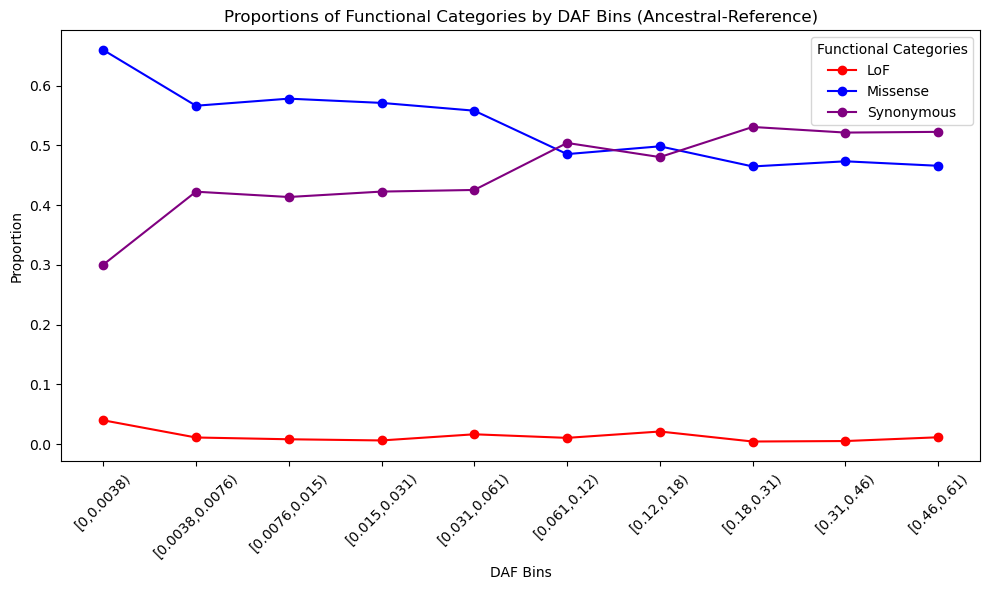

In [231]:
# Filter rows where SNV_Type is 'Ancestral-Reference'
df_ancestral = df_all[df_all['SNV_Type'] == 'Ancestral-Reference']

# Create a column for DAF bin categories
df_ancestral['DAF_bin'] = pd.cut(df_ancestral['DAF'], bins=daf_bins, labels=daf_labels, right=False)

# Calculate proportions of each category within each bin
proportions = df_ancestral.groupby(['DAF_bin', 'Functional_cat']).size().unstack(fill_value=0)

# Normalize by the total count within each DAF bin
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)

# Plotting as a line plot
plt.figure(figsize=(10,6))

# Plot each category as a line
colors=['red','blue','purple']
for i,category in enumerate(proportions_normalized.columns):
    plt.plot(proportions_normalized.index, proportions_normalized[category], label=category, marker='o',color=colors[i])

plt.title('Proportions of Functional Categories by DAF Bins (Ancestral-Reference)')
plt.xlabel('DAF Bins')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Functional Categories', loc='upper right')
plt.tight_layout()
plt.show()

In [232]:
proportions_normalized

Functional_cat,LoF,Missense,Synonymous
DAF_bin,,,
"[0,0.0038)",0.039841,0.659923,0.300235
"[0.0038,0.0076)",0.010999,0.566453,0.422548
"[0.0076,0.015)",0.008032,0.578313,0.413655
"[0.015,0.031)",0.006061,0.571212,0.422727
"[0.031,0.061)",0.016364,0.558182,0.425455
"[0.061,0.12)",0.010373,0.485477,0.504149
"[0.12,0.18)",0.021021,0.498498,0.480480
"[0.18,0.31)",0.004264,0.464819,0.530917
"[0.31,0.46)",0.005063,0.473418,0.521519


/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/2333383870.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_derived['DAF_bin'] = pd.cut(df_derived['DAF'], bins=daf_bins, labels=daf_labels, right=False)
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/2333383870.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df_derived.groupby(['DAF_bin', 'Functional_cat']).size().unstack(fill_value=0)


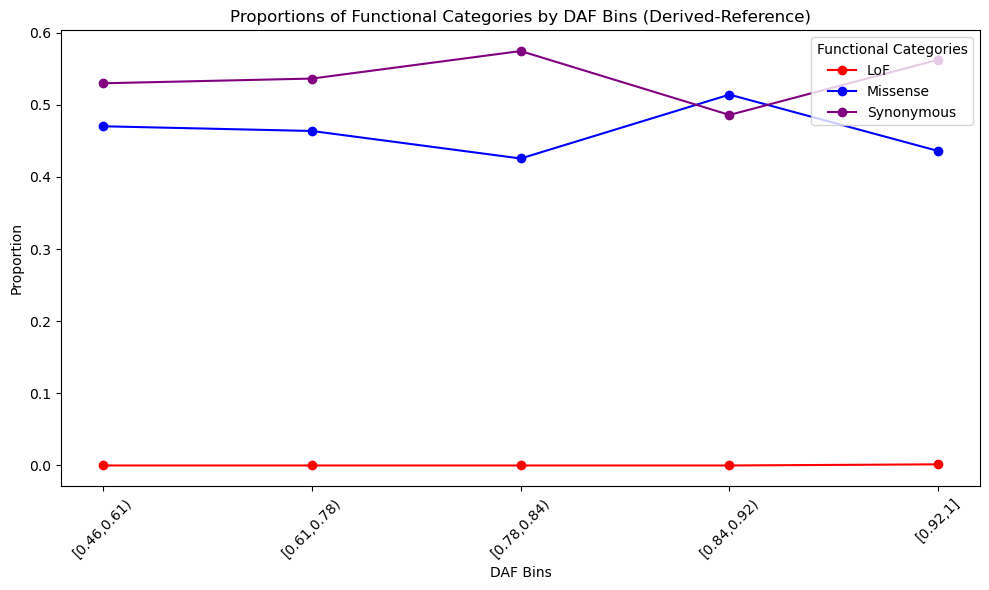

In [233]:
# Filter rows where SNV_Type is 'Ancestral-Reference'
df_derived = df_all[df_all['SNV_Type'] == 'Derived-Reference']

# Create a column for DAF bin categories
df_derived['DAF_bin'] = pd.cut(df_derived['DAF'], bins=daf_bins, labels=daf_labels, right=False)

# Calculate proportions of each category within each bin
proportions = df_derived.groupby(['DAF_bin', 'Functional_cat']).size().unstack(fill_value=0)

# Normalize by the total count within each DAF bin
proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)

# Plotting as a line plot
plt.figure(figsize=(10,6))

# Plot each category as a line
colors=['red','blue','purple']
for i,category in enumerate(proportions_normalized.columns):
    plt.plot(proportions_normalized.index, proportions_normalized[category], label=category, marker='o',color=colors[i])

plt.title('Proportions of Functional Categories by DAF Bins (Derived-Reference)')
plt.xlabel('DAF Bins')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='Functional Categories', loc='upper right')
plt.tight_layout()
plt.show()

In [234]:
proportions_normalized

Functional_cat,LoF,Missense,Synonymous
DAF_bin,,,
"[0,0.0038)",NaN,NaN,NaN
"[0.0038,0.0076)",NaN,NaN,NaN
"[0.0076,0.015)",NaN,NaN,NaN
"[0.015,0.031)",NaN,NaN,NaN
"[0.031,0.061)",NaN,NaN,NaN
"[0.061,0.12)",NaN,NaN,NaN
"[0.12,0.18)",NaN,NaN,NaN
"[0.18,0.31)",NaN,NaN,NaN
"[0.31,0.46)",NaN,NaN,NaN


In [209]:
df_ancestral['DAF_bin'].value_counts()

DAF_bin
[0,0.0038)         779539
[0.0038,0.0076)      1091
[0.0076,0.015)        747
[0.015,0.031)         660
[0.031,0.061)         550
[0.061,0.12)          482
[0.18,0.31)           469
[0.31,0.46)           395
[0.12,0.18)           333
[0.46,0.61)            88
[0.61,0.78)             0
[0.78,0.84)             0
[0.84,0.92)             0
[0.92,1]                0
Name: count, dtype: int64

In [210]:
df_derived['DAF_bin'].value_counts()

DAF_bin
[0.92,1]           2544
[0.61,0.78)         289
[0.46,0.61)         151
[0.84,0.92)         142
[0.78,0.84)          94
[0,0.0038)            0
[0.0038,0.0076)       0
[0.0076,0.015)        0
[0.015,0.031)         0
[0.031,0.061)         0
[0.061,0.12)          0
[0.12,0.18)           0
[0.18,0.31)           0
[0.31,0.46)           0
Name: count, dtype: int64

/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/148747609.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ancestral['DAF_bin'] = pd.cut(df_ancestral['DAF'], bins=daf_bins, labels=daf_labels, right=False)
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/148747609.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_derived['DAF_bin'] = pd.cut(df_derived['DAF'], bins=daf_bins, labels=daf_labels, right=False)
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_6

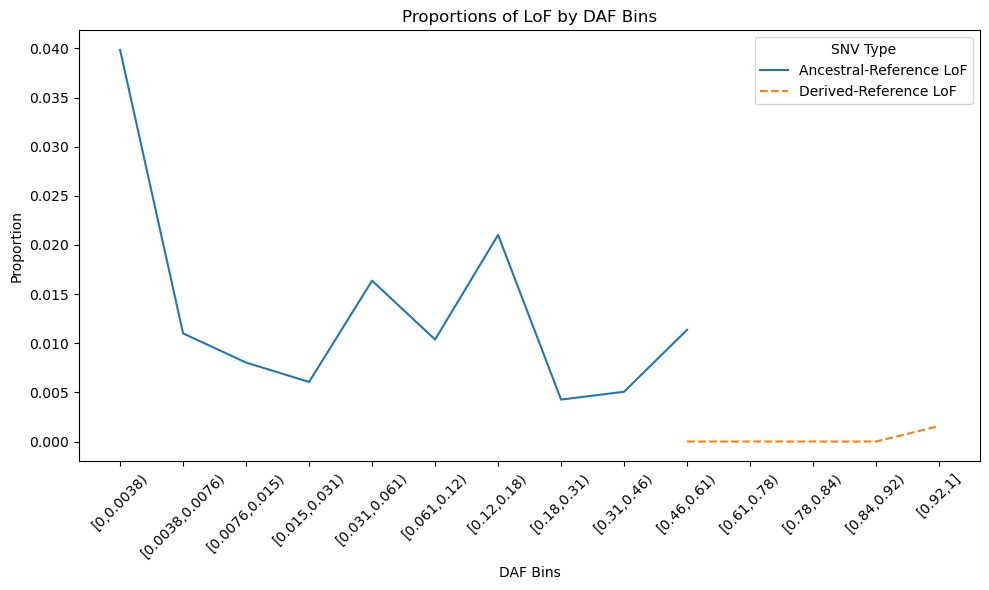

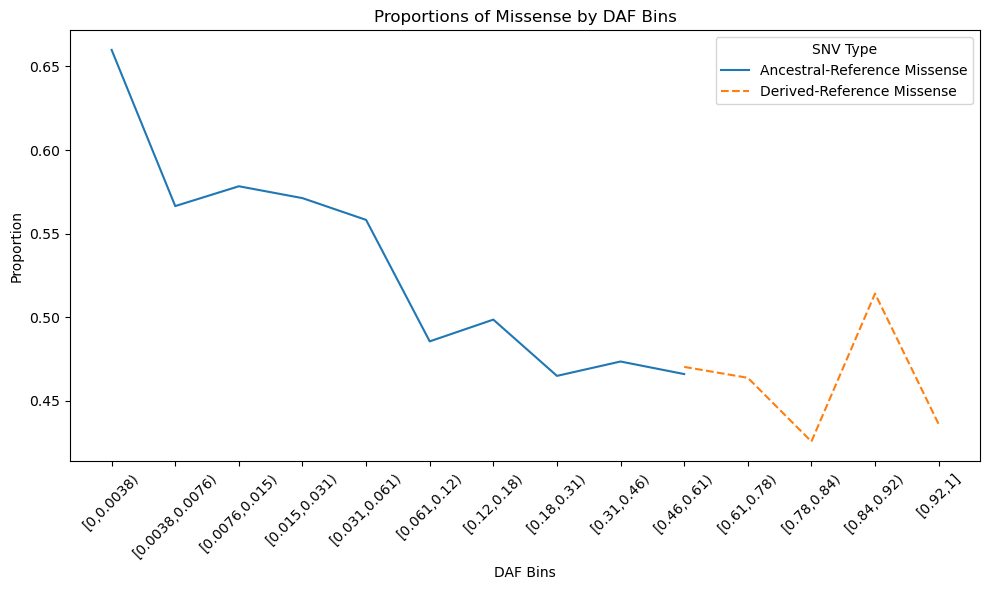

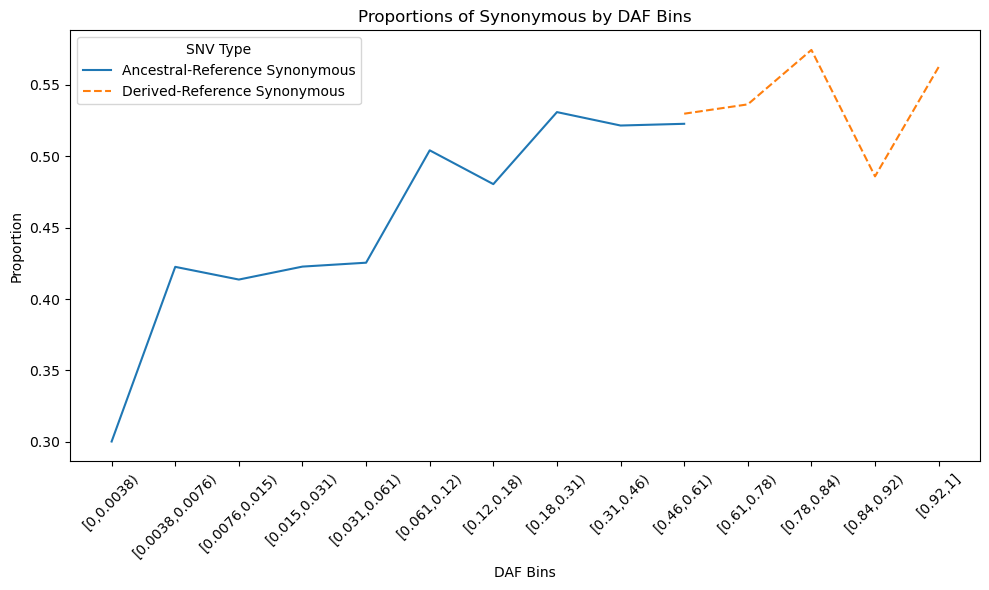

In [260]:
# Filter data by SNV_Type
df_ancestral = df_all[df_all['SNV_Type'] == 'Ancestral-Reference']
df_derived = df_all[df_all['SNV_Type'] == 'Derived-Reference']

# Create a column for DAF bin categories
df_ancestral['DAF_bin'] = pd.cut(df_ancestral['DAF'], bins=daf_bins, labels=daf_labels, right=False)
df_derived['DAF_bin'] = pd.cut(df_derived['DAF'], bins=daf_bins, labels=daf_labels, right=False)

# Calculate proportions for each category (LOF, Missense, Synonymous) for both Ancestral-Reference and Derived-Reference
def calculate_proportions(df):
    proportions = df.groupby(['DAF_bin', 'Functional_cat']).size().unstack(fill_value=0)
    proportions_normalized = proportions.div(proportions.sum(axis=1), axis=0)
    return proportions_normalized

proportions_ancestral = calculate_proportions(df_ancestral)
proportions_derived = calculate_proportions(df_derived)

# Function to plot each category on a separate plot
def plot_category_proportions(category):
    plt.figure(figsize=(10,6))
    # Plot for Ancestral-Reference (solid line)
    plt.plot(proportions_ancestral.index, proportions_ancestral[category], label=f'Ancestral-Reference {category}', marker=None, linestyle='-')
    # Plot for Derived-Reference (dashed line)
    plt.plot(proportions_derived.index, proportions_derived[category], label=f'Derived-Reference {category}', marker=None, linestyle='--')

    # Adding labels and title
    plt.title(f'Proportions of {category} by DAF Bins')
    plt.xlabel('DAF Bins')
    plt.ylabel('Proportion')
    plt.xticks(rotation=45)
    plt.legend(title='SNV Type')
    plt.tight_layout()
    plt.show()

# Plot for each category
plot_category_proportions('LoF')
plot_category_proportions('Missense')
plot_category_proportions('Synonymous')

In [245]:
df_all[df_all['DAF']>=0.61]['SNV_Type'].value_counts()

SNV_Type
Derived-Reference    3070
Name: count, dtype: int64

In [247]:
df_all[df_all['DAF']<0.61]['SNV_Type'].value_counts()

SNV_Type
Ancestral-Reference    784354
Derived-Reference         151
Name: count, dtype: int64

In [250]:
# grouped_chrom1 = df_all.groupby(['SNV_Type', 'Functional_cat']).size().unstack(fill_value=0)

# # Normalize each column to get proportions
# grouped_chrom1_proportions = grouped_chrom1.div(grouped_chrom1.sum(axis=0), axis=1)

# # Plotting the proportions
# grouped_chrom1_proportions.plot(kind='bar', stacked=False)
# plt.title('Proportion of Variant Types by Reference Allele Type')
# plt.xlabel('Reference Allele Type (Ancestral vs. Derived)')
# plt.ylabel('Proportion of Variants')
# plt.xticks(rotation=0)
# plt.show()

In [265]:
df_all[df_all['SNV_Type']=='Ancestral-Reference']['Functional_cat'].value_counts(normalize=False)

Functional_cat
Missense      517056
Synonymous    236252
LoF            31106
Name: count, dtype: int64

In [264]:
df_all[df_all['SNV_Type']=='Derived-Reference']['Functional_cat'].value_counts(normalize=False)

Functional_cat
Synonymous    1790
Missense      1427
LoF              4
Name: count, dtype: int64

In [263]:
df_all[(df_all['SNV_Type']=='Derived-Reference') & (df_all['Functional_cat']=='LoF')]

,Variant,Gene_Annotation,Functional,CHROM,POS,A2,A1,Functional_cat,CHR_x,ANCESTRAL,SNV_Type,CHR_y,SNP,MAF,NCHROBS,DAF
12923,1:1634266:C:T,MMP23B(ENSG00000189409),LoF,1,1634266,C,T,LoF,1,T,Derived-Reference,1,1:1634266:C:T,0.000025,935580,0.999975
410337,1:152154746:A:G,RPTN(ENSG00000215853),LoF,1,152154746,A,G,LoF,1,G,Derived-Reference,1,1:152154746:A:G,0.000036,939638,0.999964
484862,1:161624517:A:G,FCGR3B(ENSG00000162747),LoF,1,161624517,A,G,LoF,1,G,Derived-Reference,1,1:161624517:A:G,0.000009,939664,0.999991
718222,1:247966297:T:A,OR2AK2(ENSG00000187080),LoF,1,247966297,T,A,LoF,1,a,Derived-Reference,1,1:247966297:T:A,0.000012,939670,0.999988


/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/308742558.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df[df['Functional_cat'] == 'LoF'].groupby('DAF_bin').size() / df.groupby('DAF_bin').size()
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/308742558.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions = df[df['Functional_cat'] == 'LoF'].groupby('DAF_bin').size() / df.groupby('DAF_bin').size()
/var/folders/r0/wf2xsjdx3h366x3_hj3b7xdc0000gp/T/ipykernel_65984/308742558.py:11: FutureWarning: The default of observed=False is deprecated and will 

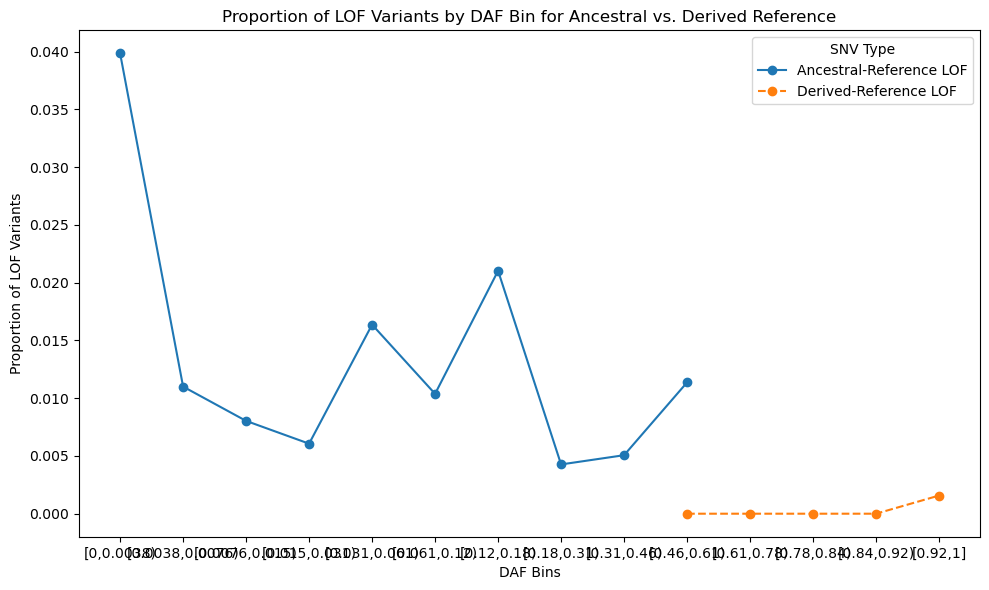

In [266]:
# Create the DAF bin categories
df_all['DAF_bin'] = pd.cut(df_all['DAF'], bins=daf_bins, labels=daf_labels, right=False)

# Filter data by SNV_Type
df_ancestral = df_all[df_all['SNV_Type'] == 'Ancestral-Reference']
df_derived = df_all[df_all['SNV_Type'] == 'Derived-Reference']

# Calculate the proportion of LOF variants within each DAF bin for both SNV types
def calculate_lof_proportions(df):
    # Group by DAF_bin and Functional_cat (we focus on LOF)
    proportions = df[df['Functional_cat'] == 'LoF'].groupby('DAF_bin').size() / df.groupby('DAF_bin').size()
    return proportions

# Calculate LOF proportions for both ancestral and derived reference variants
proportions_ancestral_lof = calculate_lof_proportions(df_ancestral)
proportions_derived_lof = calculate_lof_proportions(df_derived)

# Plotting the comparison
plt.figure(figsize=(10,6))
plt.plot(proportions_ancestral_lof.index, proportions_ancestral_lof, label='Ancestral-Reference LOF', marker='o')
plt.plot(proportions_derived_lof.index, proportions_derived_lof, label='Derived-Reference LOF', marker='o', linestyle='--')

# Adding labels and title
plt.title('Proportion of LOF Variants by DAF Bin for Ancestral vs. Derived Reference')
plt.xlabel('DAF Bins')
plt.ylabel('Proportion of LOF Variants')
plt.legend(title='SNV Type')
plt.tight_layout()
plt.show()
